# Project : Gợi ý kiểm tra sản phẩm(hàng hóa, máy móc) định kỳ

<h1 align="center"> Import the required libraries</h1>


In [6]:
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 align="center"> Load & prepend dataset</h1>


In [10]:
# load the dataset
df = pd.read_csv('dirty_sample_500.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,6253,L53432,L,300.8,310.3,1538,36.1,198,0,0,0,0,0,0
1,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
2,1732,M16591,M,298.3,307.9,1485,42.0,117,0,0,0,0,0,0
3,4743,L51922,L,303.3,311.3,1592,33.7,14,0,0,0,0,0,0
4,4522,L51701,L,302.4,310.4,1865,23.9,129,0,0,0,0,0,0


In [11]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 500, Number of columns: 14


<h1 align="center"> EDA</h1>


In [ ]:
# What is the data type ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      480 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              480 non-null    float64
 7   Tool wear [min]          500 non-null    int64  
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(3), int64(9), o

In [17]:
# Are there any missing values?
df.isnull().sum()

UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        20
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                20
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64

In [18]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [24]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [25]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],480.0,306.408542,62.289239,295.5,298.500,300.10,301.600,912.6
Process temperature [K],500.0,310.094200,1.430048,306.2,308.900,310.10,311.200,313.5
Rotational speed [rpm],500.0,1529.862000,159.219146,1251.0,1433.000,1495.00,1593.000,2549.0
Torque [Nm],480.0,39.969583,10.094236,2.6,34.175,40.45,47.025,68.6
Tool wear [min],500.0,105.394000,64.966515,0.0,47.750,103.00,160.000,231.0
Machine failure,500.0,0.034000,0.181411,0.0,0.000,0.00,0.000,1.0
TWF,500.0,0.008000,0.089173,0.0,0.000,0.00,0.000,1.0
HDF,500.0,0.012000,0.108994,0.0,0.000,0.00,0.000,1.0
PWF,500.0,0.008000,0.089173,0.0,0.000,0.00,0.000,1.0
OSF,500.0,0.006000,0.077304,0.0,0.000,0.00,0.000,1.0


In [27]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Type,500,8,L,320


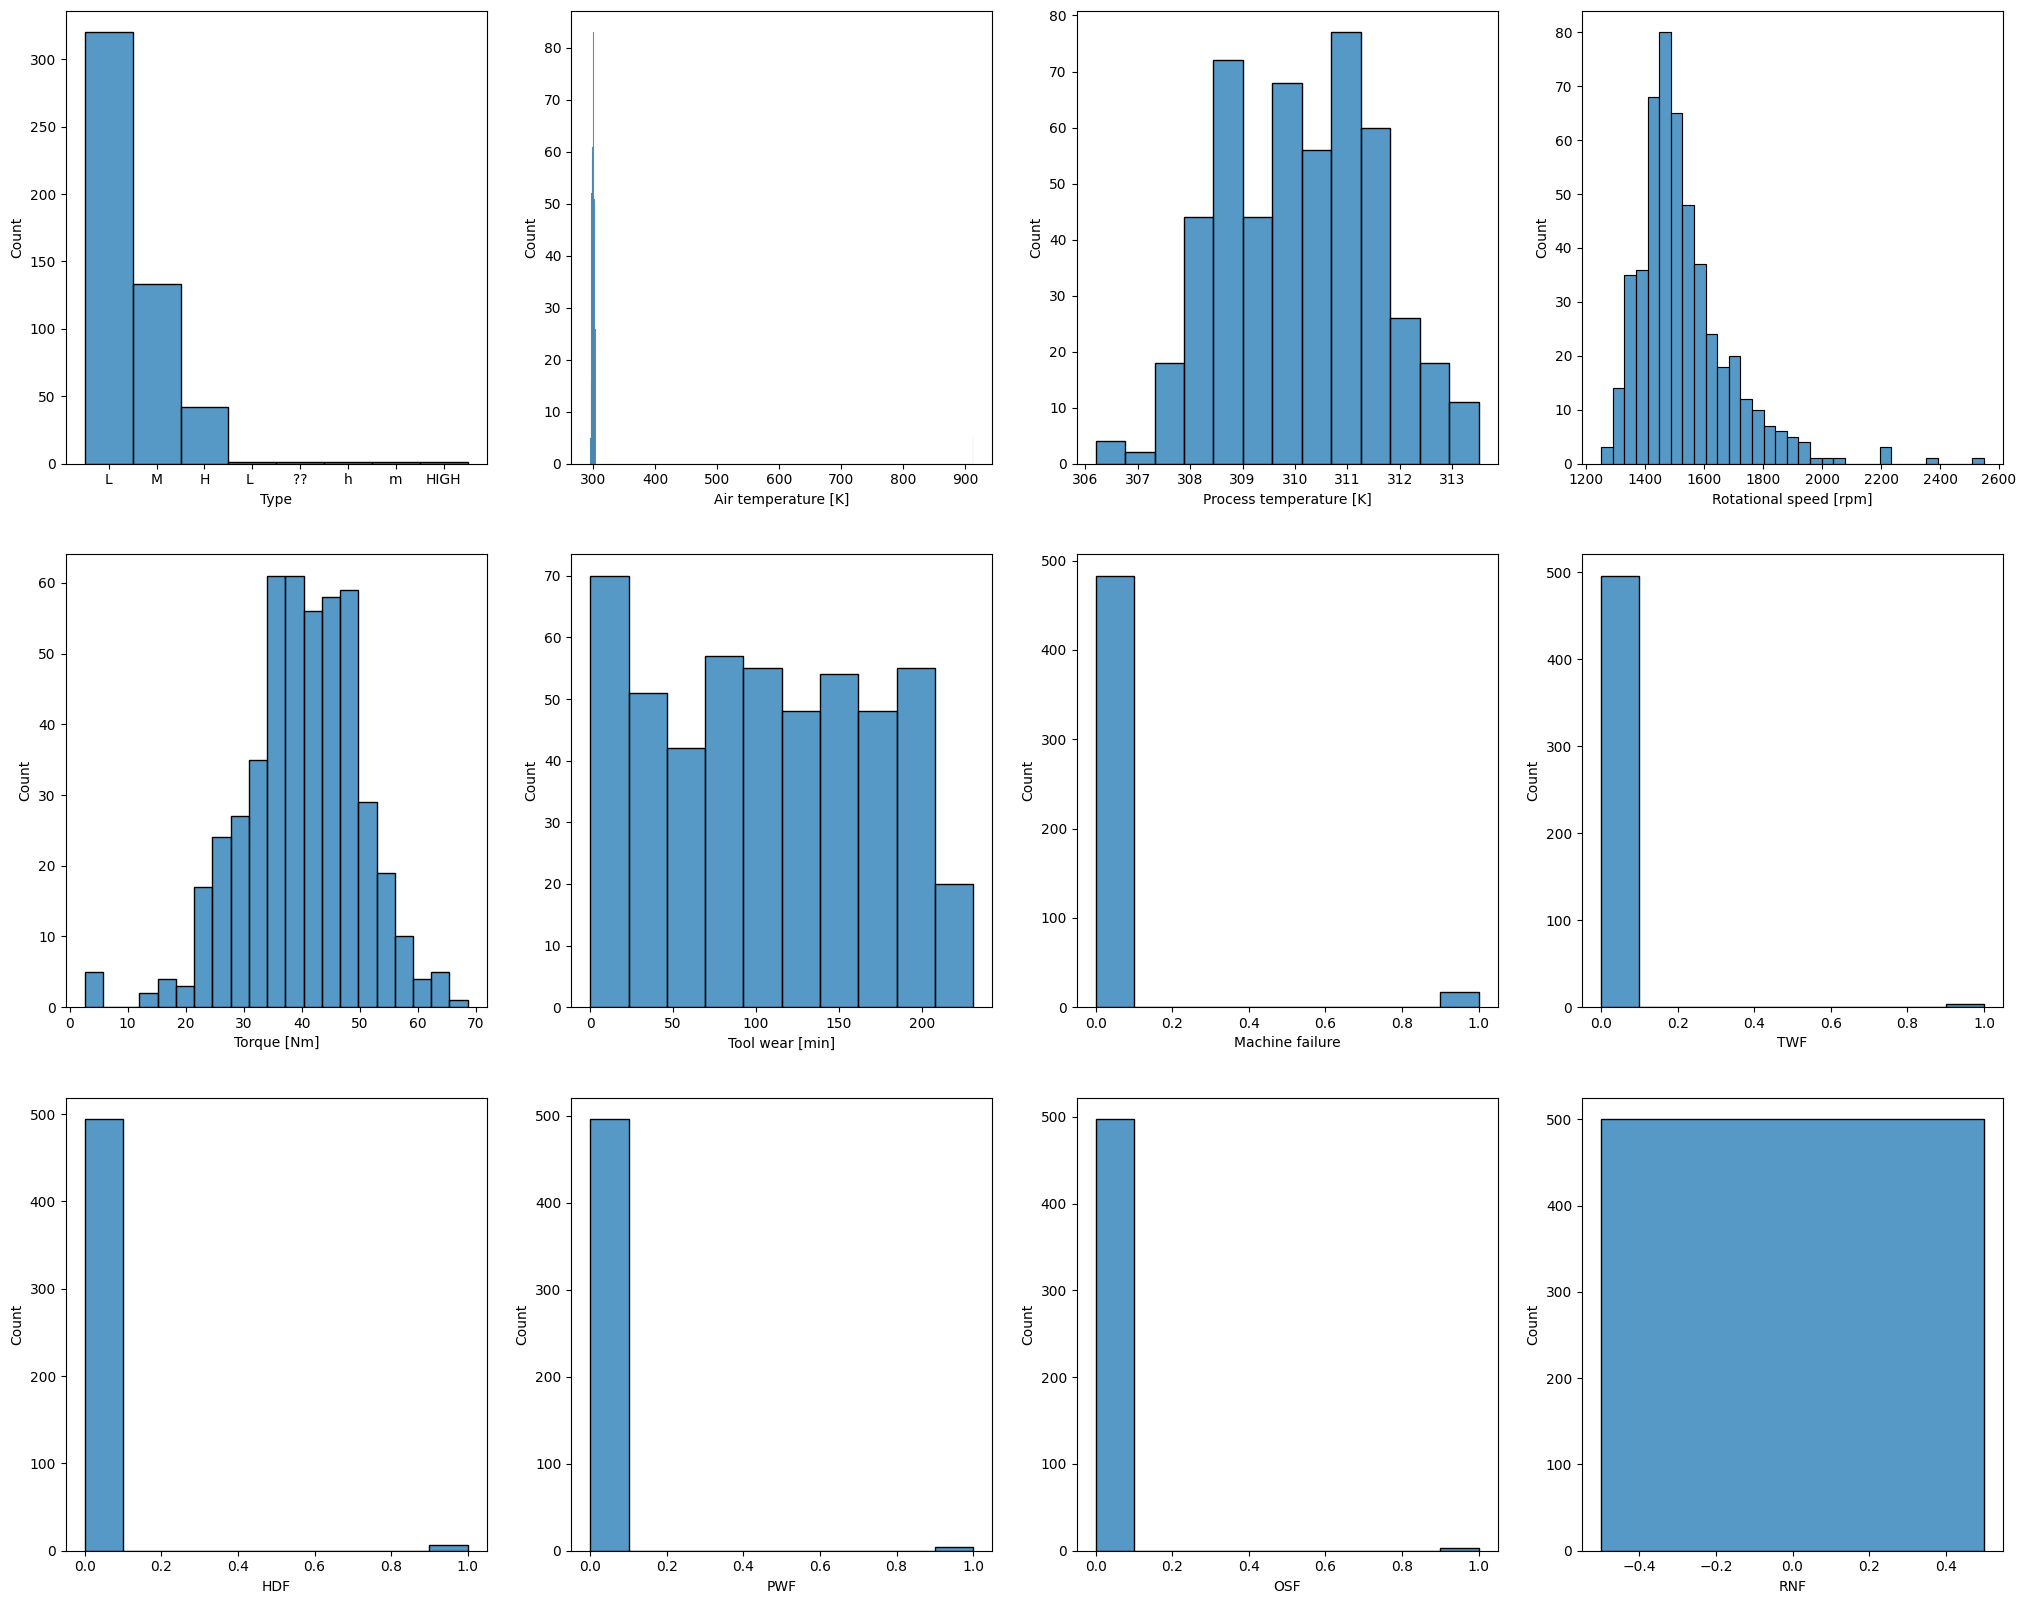

In [ ]:
#check for outliers(chars)
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

In [21]:
#check for outliers
# Outliers for numerical data 
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in column {col}: {len(outliers)} values')
    if not outliers.empty:
        print(outliers[[col]])

# Outliers for string data (using unusual string length) 
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    string_lengths = df[col].astype(str).apply(len)
    Q1, Q3 = string_lengths.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(string_lengths < lower_bound) | (string_lengths > upper_bound)]
    print(f'Outliers (string length) in column {col}: {len(outliers)} values')
    if not outliers.empty:
        print(outliers[[col]])

Outliers in column UDI: 0 values
Outliers in column Air temperature [K]: 5 values
     Air temperature [K]
73                 912.6
104                912.6
155                912.6
361                912.6
374                912.6
Outliers in column Process temperature [K]: 0 values
Outliers in column Rotational speed [rpm]: 24 values
     Rotational speed [rpm]
4                      1865
102                    2232
134                    1835
178                    1900
196                    1885
206                    1858
207                    1924
214                    1901
217                    2219
265                    1845
269                    2216
287                    2549
314                    1926
329                    1927
379                    2057
390                    1861
394                    1858
399                    2035
406                    1869
420                    1894
450                    1935
455                    1991
484               

Text(0.5, 1.0, 'Number of failure types per record')

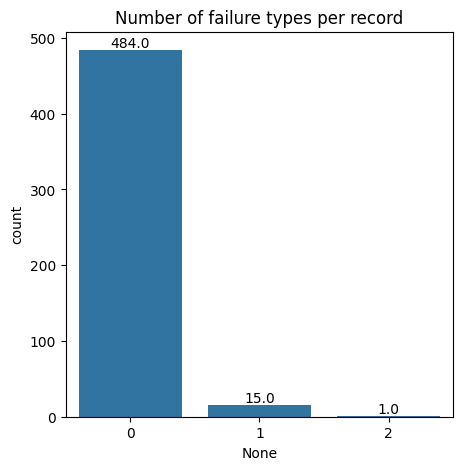

In [30]:
# Statistics of the number of types of errors
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record') 